# ML Student Performance Indicator

##### Objective: Seeking to understand how different factors affect student performance.

##### Data Source: 'https://github.com/krishnaik06/mlproject'

In [2]:
# Import Data and necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [6]:

d = 'C:/Users/ocema/OneDrive/Desktop/DS_projects/notebooks/data/stud.csv'
df = pd.read_csv(d)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Dataset Features' Information:

##### 
   * gender -> male or female
   * ethnicity -> Group A, B, C, D or E
   * parental level of education -> Bachelor's, some college, master's degree, associate's degree, high school
   * lunch -> having lunch before test (standard or free/reduced)
   * test preparation course -> complete or not complete before final exam
   * math score
   * reading score
   * writing score


#### Data Processing and Cleaning --
#####
   * Investigate and understand the data
   * Check Duplicates
   * Check Data Types 
   * Check the number of unique values of each column
   * check the stats of dataset
   

##### Checking for missing values

In [7]:
df.isna().sum()

# There are no null values in the dataset

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no null values in the dataset. Next, we will check for duplicates

In [10]:
df.duplicated().sum()

0

##### There are also no duplicates in the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.shape

(1000, 8)

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

##### 
* Standard Deviations and Means are all fairly close in all features.
* Math has a min score of 0. No one scored 0 in reading and writing.

In [20]:
print('Categories in race_ethnicity variable: ', end = ' ')
print(df['race_ethnicity'].unique())
print('Categories in gender variable: ', end = ' ')
print(df['gender'].unique())
print('Categories in parental level of education variable: ', end = ' ')
print(df['parental_level_of_education'].unique())
print('Categories in lunch variable: ', end = ' ')
print(df['lunch'].unique())
print('Categories in "test preparation course" variable: ', end = ' ')
print(df['test_preparation_course'].unique())

Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in gender variable:  ['female' 'male']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in "test preparation course" variable:  ['none' 'completed']


In [21]:
## Grouping the data types
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

numerical_features

['math_score', 'reading_score', 'writing_score']

#### Adding columns for 'Total Score' and 'Average'

In [24]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = round(df['total_score'] / 3, 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [29]:
full_math = df[df['math_score'] == 100]['gender'].count()
full_writing = df[df['writing_score'] == 100]['gender'].count()
full_reading = df[df['reading_score'] == 100]['gender'].count()

In [30]:
print(f'The number of students that achieved full math marks is {full_math}')
print(f'The number of students that achieved full writing marks is {full_writing}')
print(f'The number of students that achieved full reading marks is {full_reading}')

The number of students that achieved full math marks is 7
The number of students that achieved full writing marks is 14
The number of students that achieved full reading marks is 17


### Visualization of the data
#####
* Histogram
* KDF (Kernel Distribution Function)


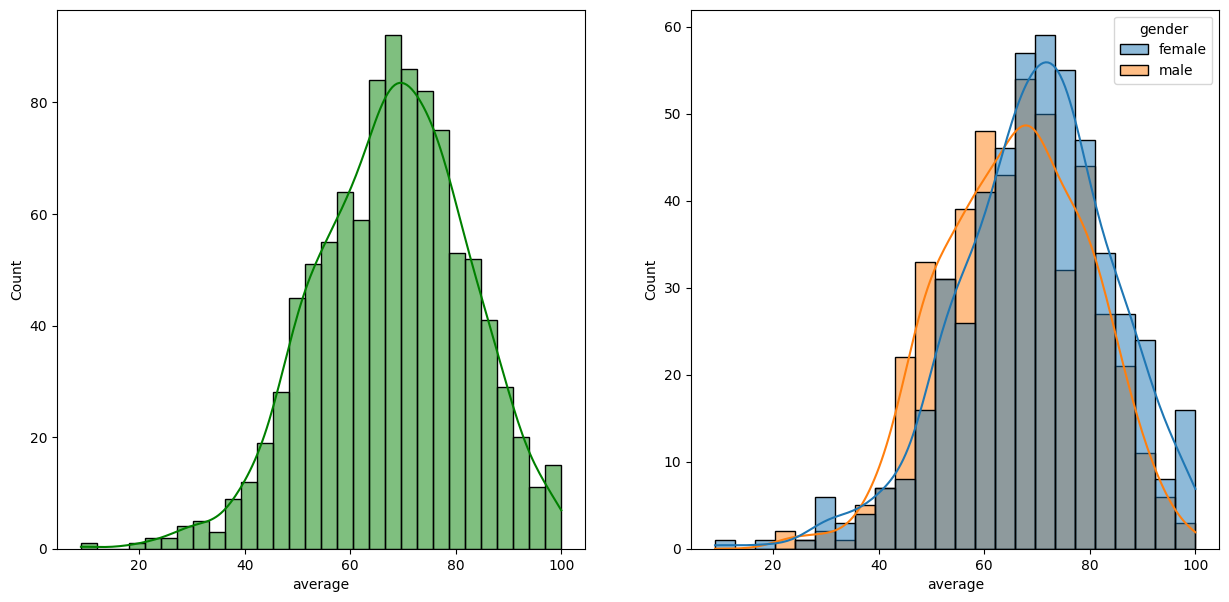

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30 ,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True, hue='gender')
plt.show()

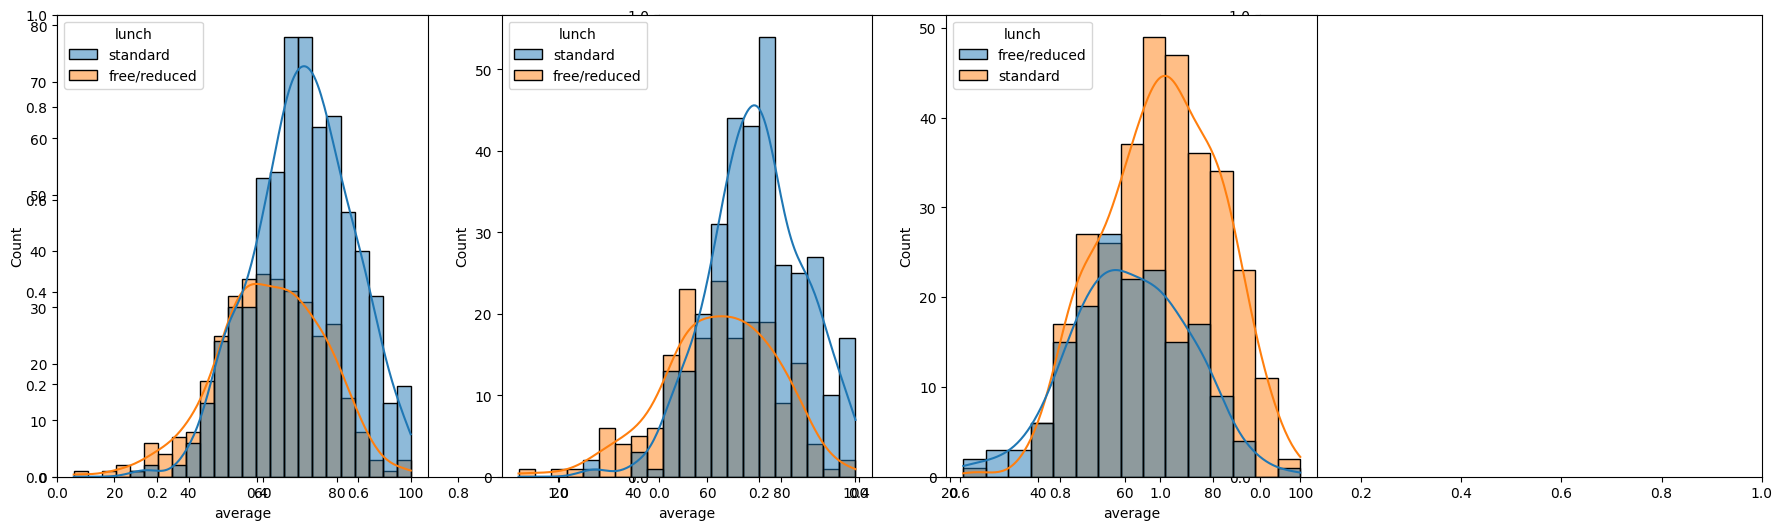

In [33]:
plt.subplots(1,3,figsize=(22,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average',kde=True, hue='lunch')
plt.show()